# Clipping to a fixed cell size

The goal of this notebook is to demonstrate basic clipping.

### Decription
Ths notebook reads a netcdf using the [xarray](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.interp.html) library and clips the dataset based on lat/lon parameters. 

### Setup
First run:

```
# download files from S3
wget https://jataware-world-modelers.s3.amazonaws.com/analytic-layers/sample_2.nc
```

### Requirements
```
matplotlib==3.4.2
netCDF4==1.5.7
numpy==1.20.3
xarray==0.18.2

```

In [1]:
%matplotlib inline

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

#### Load and examine the netCDF dataset using xarray.

In [3]:
ds = xr.open_dataset('sample_2.nc', engine='netcdf4')
ds

<xarray.Dataset>
Dimensions:    (lon: 180, bnds: 2, lat: 170, time: 24)
Coordinates:
  * lon        (lon) float64 1.0 3.0 5.0 7.0 9.0 ... 353.0 355.0 357.0 359.0
  * lat        (lat) float64 -79.5 -78.5 -77.5 -76.5 ... 86.5 87.5 88.5 89.5
  * time       (time) object 2001-01-16 00:00:00 ... 2002-12-16 00:00:00
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    time_bnds  (time, bnds) object ...
    tos        (time, lat, lon) float32 ...
Attributes: (12/13)
    title:          IPSL  model output prepared for IPCC Fourth Assessment SR...
    institution:    IPSL (Institut Pierre Simon Laplace, Paris, France)
    source:         IPSL-CM4_v1 (2003) : atmosphere : LMDZ (IPSL-CM4_IPCC, 96...
    contact:        Sebastien Denvil, sebastien.denvil@ipsl.jussieu.fr
    project_id:     IPCC Fourth Assessment
    table_id:       Table O1 (13 November 2004)
    ...             ...
    realization:    1
    cmor_version:   0.96
    Conventions:    CF-1.0
    history:        YYYY/MM/JJ: data generated; YYYY/MM/JJ+1 data transformed...
    references:     Dufresne et al, Journal of Climate, 2015, vol XX, p 136
    comment:        Test drive

#### Examine lat and lon more closely to identify range and spacing.

In [4]:
print(ds.lat.head())
print()
print(ds.lon.head())

<xarray.DataArray 'lat' (lat: 5)>
array([-79.5, -78.5, -77.5, -76.5, -75.5])
Coordinates:
  * lat      (lat) float64 -79.5 -78.5 -77.5 -76.5 -75.5
Attributes:
    standard_name:   latitude
    long_name:       latitude
    units:           degrees_north
    axis:            Y
    bounds:          lat_bnds
    original_units:  degrees_north

<xarray.DataArray 'lon' (lon: 5)>
array([1., 3., 5., 7., 9.])
Coordinates:
  * lon      (lon) float64 1.0 3.0 5.0 7.0 9.0
Attributes:
    standard_name:   longitude
    long_name:       longitude
    units:           degrees_east
    axis:            X
    bounds:          lon_bnds
    original_units:  degrees_east


#### Select new lat/lon values based on the dataset lat lon ranges.

In [5]:
lat1 = np.where(np.array(ds.lat) == -5.5)[0]
lat2 = np.where(np.array(ds.lat) == 55.5)[0]
lon1 = np.where(np.array(ds.lon) == 85)[0]
lon2 = np.where(np.array(ds.lon) == 175)[0]
print(lat1, lat2, lon1, lon2) # note, these are np.ndarrays.

[74] [135] [42] [87]


#### Filter the dataset using the new lat/lon parameters.

In [7]:
ds2 = ds.sel(lat=ds.lat[lat1[0]:lat2[0]]).sel(lon=ds.lon[lon1[0]:lon2[0]])

#### Plot the first time coordinate of the original and clipped datasets.

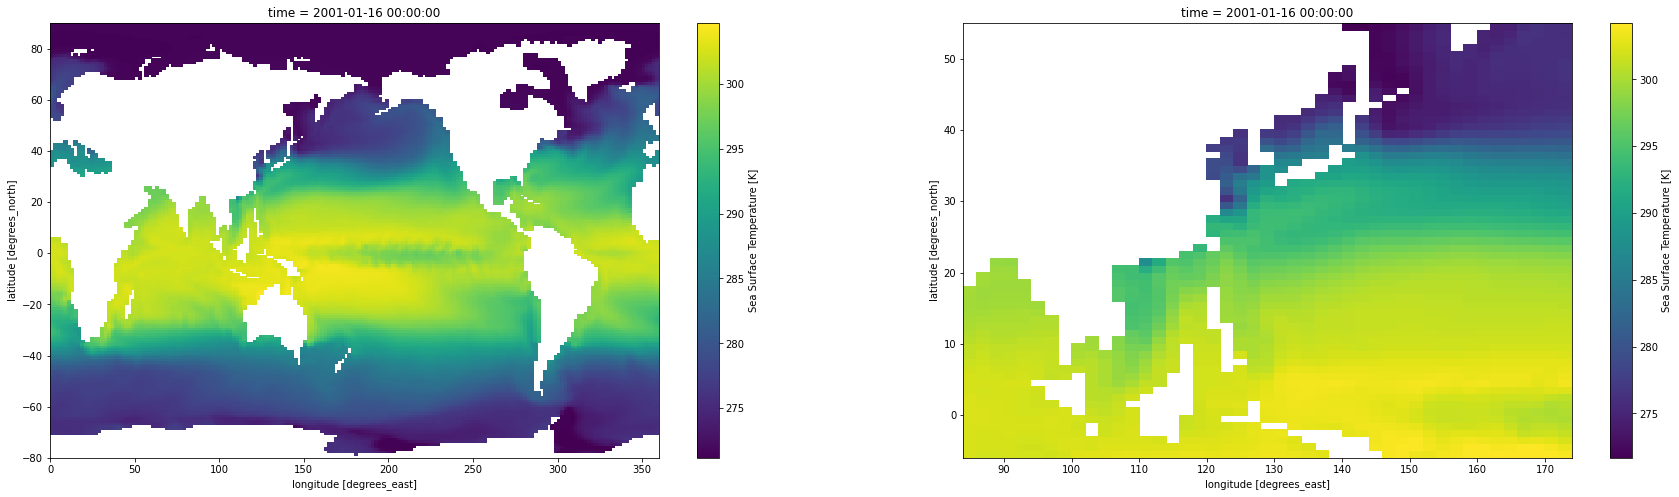

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(30, 8))
ds.tos[0,:,:].plot(ax=axes[0])
ds2.tos[0,:,:].plot(ax=axes[1])